# Movies on Netflix, Prime Video, Hulu and Disney+

The **"Movies on Netflix, Prime Video, Hulu, and Disney+"** dataset on Kaggle provides details on over 5,000 movies across these streaming platforms. It includes features such as *title*, *year*, *age rating*, *runtime*, *genres*, and streaming platform availability, allowing users to analyze content diversity, exclusivity, and availability by service. This dataset is particularly useful for comparing content strategies and audience targeting across these platforms.

For full details, visit the dataset on Kaggle: [Movies on Netflix, Prime Video, Hulu, and Disney+](https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney).

This notebook analyzes this dataset and aims to perform the following tasks by taking proper statistical measures: 

- Perform a detailed descriptive analysis of the data set. Use appropriate statistical measures to
describe it. Include at least one statistical graphic. The descriptive analysis should be aimed at
answering the above questions.

- Perform appropriate statistical hypotheses tests to answer the two above questions: Is the age
restriction for movies on Disney+ lower than for movies on Netflix? Is there a difference in Rotten
Tomatoes Score for movies on those two platforms? Give reasons for your choice of test.

## 0. Dataset Loading

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from sklearn.impute import KNNImputer

file_path = 'MoviesOnStreamingPlatforms.csv'
df = pd.read_csv(file_path)

## 1. Data Overview

### 1.1 Check Head and Tail

In [67]:
display(df.head())

display(df.tail())


,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0
9514,9514,9515,Women of Impact: Changing the World,2019,7+,10/100,0,0,0,1,0


### 1.2 Data Info Summary

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


## 2. Summary Statistics

### 2.1 Descriptive Statistics for Numerical Columns

In [69]:
df.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.0
mean,4757.000000,4758.000000,2007.422386,0.388334,0.110037,0.432265,0.096900,0.0
std,2746.888239,2746.888239,19.130367,0.487397,0.312952,0.495417,0.295837,0.0
min,0.000000,1.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2378.500000,2379.500000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4757.000000,4758.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7135.500000,7136.500000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,9514.000000,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [70]:
num_records = df.shape[0]

print(f"The dataset contains {num_records} records.")

The dataset contains 9515 records.


In [71]:
print(df.dtypes)

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object


### 2.2 Counts for Categorical Columns

In [72]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Title:
Title
The Irishman                           1
Burden                                 1
Elon Musk: The Real Life Iron Man      1
Albion: The Enchanted Stallion         1
Songwriter                             1
                                      ..
Berlin Berlin                          1
Bollywood Calling                      1
Ujala                                  1
Babamın Ceketi                         1
Women of Impact: Changing the World    1
Name: count, Length: 9515, dtype: int64

Age:
Age
18+    2276
7+     1090
13+     998
all     698
16+     276
Name: count, dtype: int64

Rotten Tomatoes:
Rotten Tomatoes
44/100    311
46/100    298
47/100    291
49/100    290
43/100    289
         ... 
23/100      1
24/100      1
97/100      1
95/100      1
96/100      1
Name: count, Length: 85, dtype: int64



## 3. Missing Values

### 3.1 Missing Value Counts and Percentages

In [73]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
Age,4177,43.899107
Rotten Tomatoes,7,0.073568


In [74]:
# Filter for Netflix and Disney+ movies with missing 'Age' values
missing_age_netflix = df[(df['Netflix'] == 1) & (df['Age'].isnull())].shape[0]
missing_age_disney = df[(df['Disney+'] == 1) & (df['Age'].isnull())].shape[0]

print(f"Number of Netflix movies with missing Age: {missing_age_netflix}")
print(f"Number of Disney+ movies with missing Age: {missing_age_disney}")

Number of Netflix movies with missing Age: 1797
Number of Disney+ movies with missing Age: 197


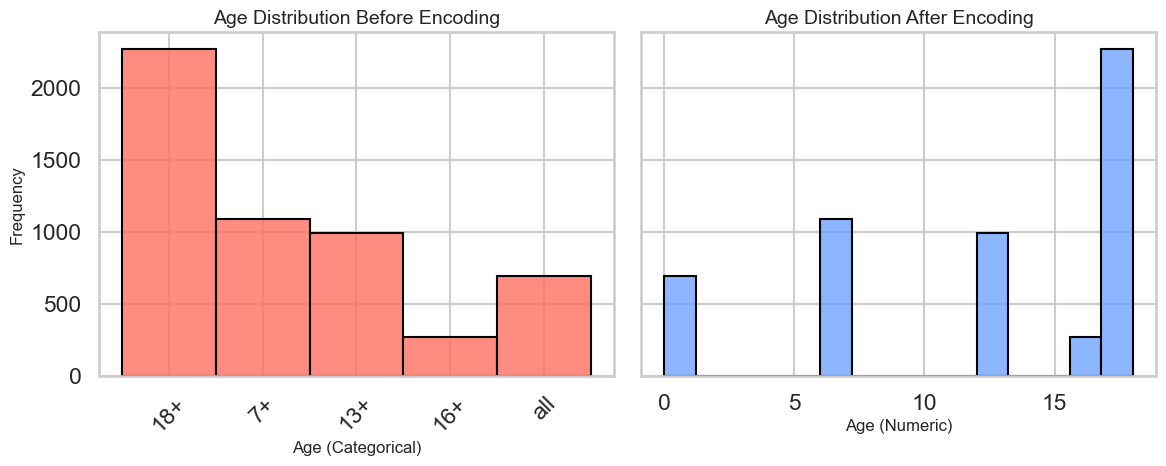

In [75]:


# Assuming df is already defined
# Example before encoding
age_before_encoding = df['Age']

# Function to encode 'Age'
def encode_age(age):
    if pd.isnull(age):
        return None  # Keep NaN as is
    if age.lower() == 'all':
        return 0  # Convert 'All' to 0
    return int(age.replace('+', ''))  # Remove '+' and convert to int

# Apply encoding
df['Age'] = df['Age'].apply(encode_age)
age_after_encoding = df['Age']

# Setting Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Plotting the histograms side by side with improved colors
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram before encoding
sns.histplot(data=age_before_encoding, kde=False, ax=axes[0], color="#FF6F61", edgecolor="black", alpha=0.8)
axes[0].set_title('Age Distribution Before Encoding', fontsize=14)
axes[0].set_xlabel('Age (Categorical)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Histogram after encoding
sns.histplot(data=age_after_encoding, kde=False, ax=axes[1], color="#6FA4FF", edgecolor="black", alpha=0.8)
axes[1].set_title('Age Distribution After Encoding', fontsize=14)
axes[1].set_xlabel('Age (Numeric)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Set the same y-axis limit for both plots for easy comparison
axes[0].set_ylim(0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]))

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
# # Create a copy for the before imputation plot
# age_before_imputation = df['Age'].copy()

# # Perform mode imputation on Age
# mode_age = df['Age'].mode()[0]  # Get the mode of the Age column
# df['Age'].fillna(mode_age, inplace=True)  # Fill NaN values with the mode

# # Create a copy for the after imputation plot
# age_after_imputation = df['Age']

# # Plot KDE plots before and after mode imputation
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# # KDE plot before mode imputation
# sns.kdeplot(data=age_before_imputation.dropna(), ax=axes[0], color="blue", fill=True)
# axes[0].set_title('KDE of Age Before Mode Imputation')
# axes[0].set_xlabel('Age')
# axes[0].set_ylabel('Density')

# # KDE plot after mode imputation
# sns.kdeplot(data=age_after_imputation, ax=axes[1], color="green", fill=True)
# axes[1].set_title('KDE of Age After Mode Imputation')
# axes[1].set_xlabel('Age')
# axes[1].set_ylabel('Density')

# # Show the plot
# plt.tight_layout()
# plt.show()

In [77]:
# sns.countplot(data=df, x='Age', order=df['Age'].value_counts().index)

# plt.title('Distribution of Age Ratings')
# plt.xlabel('Age Rating')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)  
# plt.show()

In [78]:
# sns.histplot(data=age_data, kde=True, bins=10, stat="density", alpha=0.5)

# plt.title('Histogram and KDE of Age Ratings')
# plt.xlabel('Age Rating')
# plt.ylabel('Density')
# plt.show()


In [79]:
# def convert_age(age):
#     if pd.isnull(age):
#         return None  # Keep NaN as is for missing values
#     if age.lower() == 'all':
#         return 0  # Convert 'all' to 0
#     return int(age.replace('+', ''))  # Remove '+' and convert to int

# # Apply the function to the 'Age' column
# df['Age'] = df['Age'].apply(convert_age)

# # Verify the conversion
# print(df['Age'].head())

In [80]:
# # Drop missing values in the 'Age' column for KDE
# age_data = df['Age'].dropna()

# # Plot the KDE for the Age variable
# sns.kdeplot(data=age_data, bw_adjust=0.5, fill=True, color="blue")

# # Add title and labels
# plt.title('Kernel Density Estimate of Age Ratings')
# plt.xlabel('Age Rating')
# plt.ylabel('Density')
# plt.show()

In [81]:
# sns.histplot(data=age_data, kde=True, bins=10, color="blue", stat="density", alpha=0.6)

# # Add title and labels
# plt.title('Histogram and KDE of Age Ratings')
# plt.xlabel('Age Rating')
# plt.ylabel('Density')
# plt.show()

In [82]:
# # Mode imputation: Fill missing Age values with the mode (most frequent value) of the column
# df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

# # Verify the result
# print(df['Age'].isnull().sum())

In [83]:
# # Plot histogram with KDE overlay
# sns.histplot(data=df, x='Age', kde=True, bins=10, stat='density', color='blue', alpha=0.6)

# # Add title and labels
# plt.title('Histogram and KDE of Age Ratings After Mode Imputation')
# plt.xlabel('Age Rating')
# plt.ylabel('Density')
# plt.show()

In [84]:
# sns.kdeplot(data=df['Age'], bw_adjust=0.5, fill=True, color="blue")

# # Add title and labels
# plt.title('Kernel Density Estimate of Age Ratings')
# plt.xlabel('Age Rating')
# plt.ylabel('Density')
# plt.show()

In [85]:
def convert_rotten_tomatoes(score):
    if pd.isnull(score):
        return None  # Keep NaN for missing values
    try:
        # Split the string by '/' and convert to percentage
        num, denom = map(float, score.split('/'))
        return (num / denom) * 100
    except ValueError:
        return None  # Handle unexpected formats or errors

# Apply the function to the Rotten Tomatoes column
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(convert_rotten_tomatoes)

# Verify the conversion
print(df['Rotten Tomatoes'].head())

0    98.0
1    97.0
2    95.0
3    94.0
4    94.0
Name: Rotten Tomatoes, dtype: float64


In [86]:

# # Create a copy of Age column before imputation for comparison
# age_before_imputation = df['Age'].copy()

# # Selecting relevant columns for KNN imputation (adjust these columns as necessary)
# columns_for_imputation = ['Age', 'Year', 'Rotten Tomatoes']
# imputer = KNNImputer(n_neighbors=5)

# # Apply KNN imputation on the selected columns
# df[columns_for_imputation] = imputer.fit_transform(df[columns_for_imputation])

# # Create a copy of Age column after imputation
# age_after_imputation = df['Age']

# # Plot KDE plots before and after KNN imputation
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# # KDE plot before KNN imputation
# sns.kdeplot(data=age_before_imputation.dropna(), ax=axes[0], color="blue", fill=True)
# axes[0].set_title('KDE of Age Before KNN Imputation')
# axes[0].set_xlabel('Age')
# axes[0].set_ylabel('Density')

# # KDE plot after KNN imputation
# sns.kdeplot(data=age_after_imputation, ax=axes[1], color="green", fill=True)
# axes[1].set_title('KDE of Age After KNN Imputation')
# axes[1].set_xlabel('Age')
# axes[1].set_ylabel('Density')

# # Show the plot
# plt.tight_layout()
# plt.show()

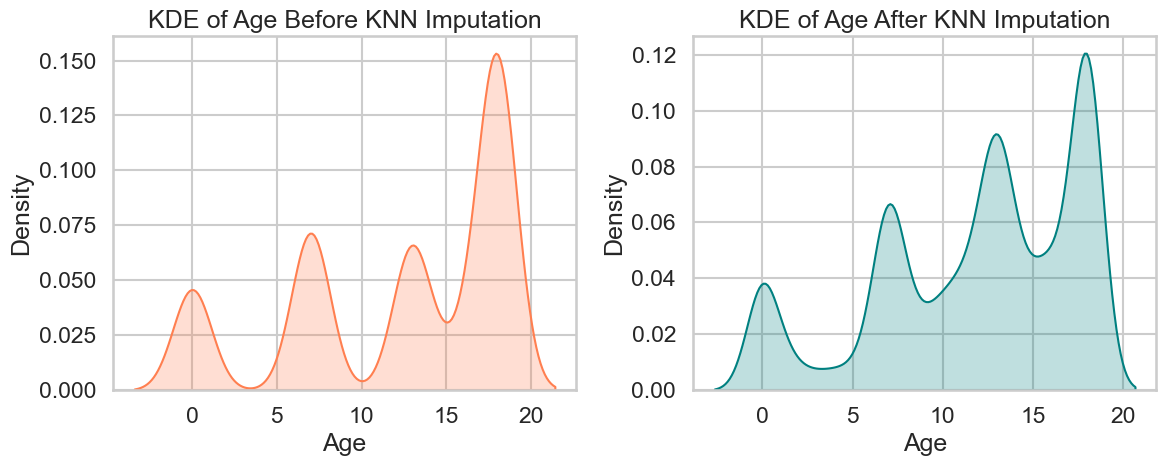

In [87]:
# Create a copy of Age column before imputation for comparison
age_before_imputation = df['Age'].copy()

# Selecting relevant columns for KNN imputation (adjust these columns as necessary)
columns_for_imputation = ['Age', 'Year', 'Rotten Tomatoes']
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation on the selected columns
df[columns_for_imputation] = imputer.fit_transform(df[columns_for_imputation])

# Create a copy of Age column after imputation
age_after_imputation = df['Age']

# Plot KDE plots before and after KNN imputation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot before KNN imputation with a distinct color (e.g., coral)
sns.kdeplot(data=age_before_imputation.dropna(), ax=axes[0], color="coral", fill=True)
axes[0].set_title('KDE of Age Before KNN Imputation')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# KDE plot after KNN imputation with a distinct color (e.g., teal)
sns.kdeplot(data=age_after_imputation, ax=axes[1], color="teal", fill=True)
axes[1].set_title('KDE of Age After KNN Imputation')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

In [88]:
# imputer = KNNImputer(n_neighbors=5)
# df['Age'] = imputer.fit_transform(df[['Age', 'Year', 'Rotten Tomatoes']])[:, 0]

In [89]:
# sns.kdeplot(data=df['Age'], bw_adjust=0.5, fill=True, color="blue")

# # Add title and labels
# plt.title('Kernel Density Estimate of Age Ratings')
# plt.xlabel('Age Rating')
# plt.ylabel('Density')
# plt.show()

Mean Rotten Tomatoes score for Netflix: 54.45
Mean Rotten Tomatoes score for Disney+: 58.31


/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/678062546.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boxplot['Platform'] = df_boxplot.apply(lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1)
/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/678062546.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['Netflix', 'Disney+'], x=[mean_netflix, mean_disney], palette=["#4C72B0", "#DD8452"], edgecolor="black", linewidth=1.5)


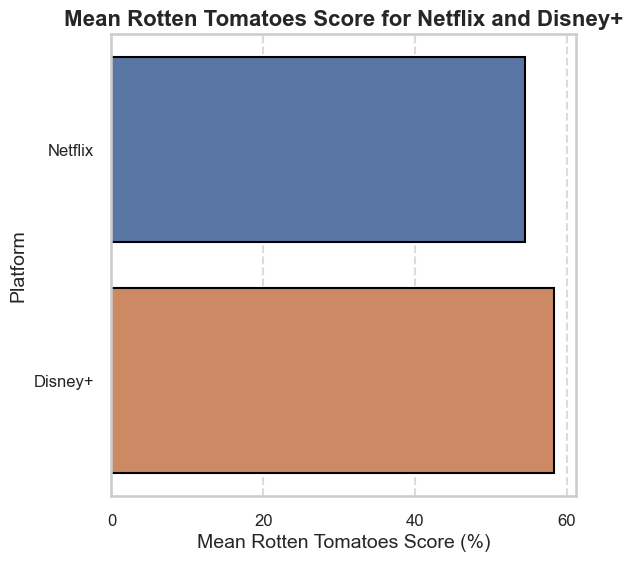

/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/678062546.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot, y='Platform', x='Rotten Tomatoes', palette=["#4C72B0", "#DD8452"], linewidth=1.5)


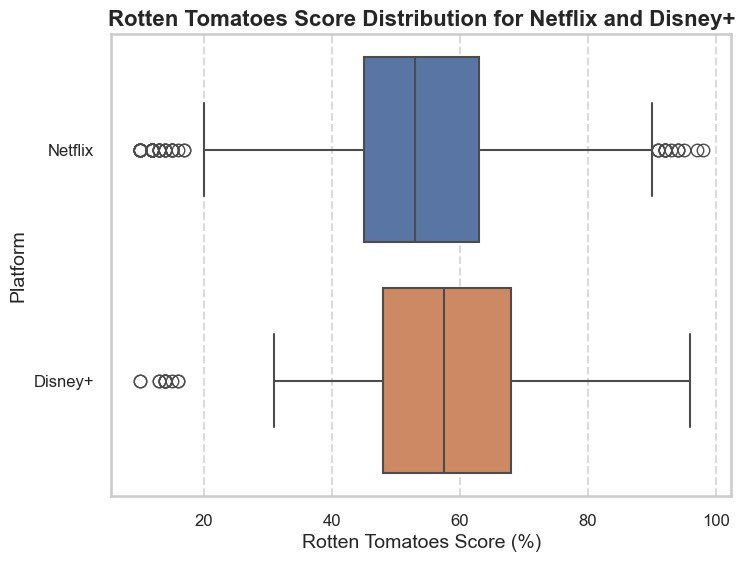

In [90]:

# Calculate mean Rotten Tomatoes score for Netflix and Disney+
mean_netflix = df[df['Netflix'] == 1]['Rotten Tomatoes'].mean()
mean_disney = df[df['Disney+'] == 1]['Rotten Tomatoes'].mean()

print(f"Mean Rotten Tomatoes score for Netflix: {mean_netflix:.2f}")
print(f"Mean Rotten Tomatoes score for Disney+: {mean_disney:.2f}")

# Create a new DataFrame for the box plot
df_boxplot = df[(df['Rotten Tomatoes'].notnull()) & ((df['Netflix'] == 1) | (df['Disney+'] == 1))]
df_boxplot['Platform'] = df_boxplot.apply(lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1)

# Set a modern Seaborn style for the plots
sns.set(style="whitegrid", context="talk", palette="pastel")

# Plot the Mean Bar Plot in a separate figure with a new look
plt.figure(figsize=(6, 6))
sns.barplot(y=['Netflix', 'Disney+'], x=[mean_netflix, mean_disney], palette=["#4C72B0", "#DD8452"], edgecolor="black", linewidth=1.5)
plt.title("Mean Rotten Tomatoes Score for Netflix and Disney+", fontsize=16, weight='bold')
plt.xlabel("Mean Rotten Tomatoes Score (%)", fontsize=14)
plt.ylabel("Platform", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot the Box Plot in a separate figure with a new look
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_boxplot, y='Platform', x='Rotten Tomatoes', palette=["#4C72B0", "#DD8452"], linewidth=1.5)
plt.title("Rotten Tomatoes Score Distribution for Netflix and Disney+", fontsize=16, weight='bold')
plt.xlabel("Rotten Tomatoes Score (%)", fontsize=14)
plt.ylabel("Platform", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/1186151323.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boxplot_age['Platform'] = df_boxplot_age.apply(lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1)
/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/1186151323.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['Netflix', 'Disney+'], x=[mean_age_netflix, mean_age_disney], palette=["#FFCC66", "#66CC99"], edgecolor="black", linewidth=1.5)


Mean Age for Netflix: 13.02
Mean Age for Disney+: 4.70


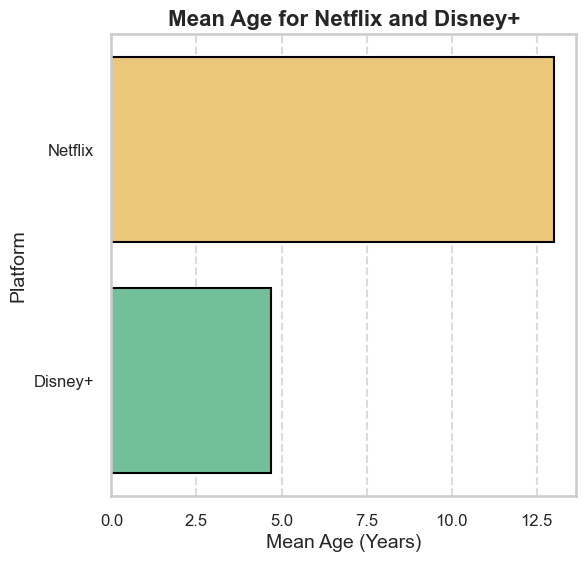

/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/1186151323.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot_age, y='Platform', x='Age', palette=["#FFCC66", "#66CC99"], linewidth=1.5)


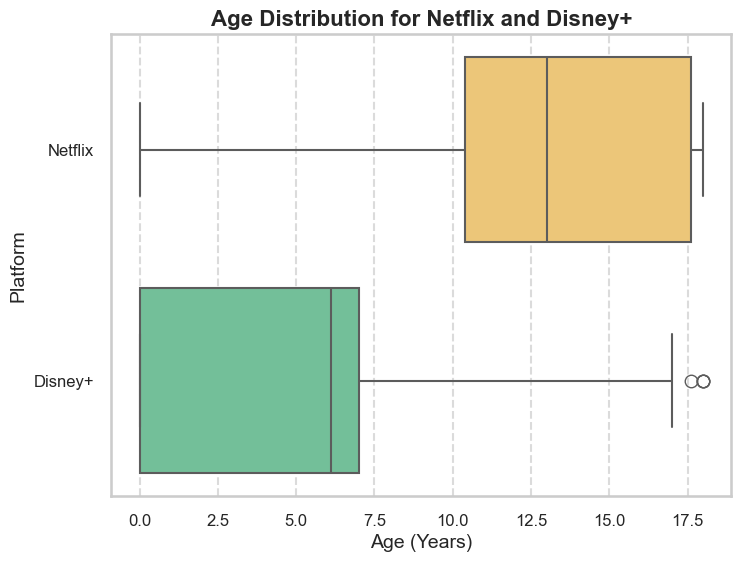

In [91]:
# Calculate mean Age for Netflix and Disney+
mean_age_netflix = df[df['Netflix'] == 1]['Age'].mean()
mean_age_disney = df[df['Disney+'] == 1]['Age'].mean()

print(f"Mean Age for Netflix: {mean_age_netflix:.2f}")
print(f"Mean Age for Disney+: {mean_age_disney:.2f}")

# Create a new DataFrame for the box plot
df_boxplot_age = df[(df['Age'].notnull()) & ((df['Netflix'] == 1) | (df['Disney+'] == 1))]
df_boxplot_age['Platform'] = df_boxplot_age.apply(lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1)

# Set a modern Seaborn style for the plots
sns.set(style="whitegrid", context="talk", palette="pastel")

# Plot the Mean Bar Plot for Age in a separate figure with a new look
plt.figure(figsize=(6, 6))
sns.barplot(y=['Netflix', 'Disney+'], x=[mean_age_netflix, mean_age_disney], palette=["#FFCC66", "#66CC99"], edgecolor="black", linewidth=1.5)
plt.title("Mean Age for Netflix and Disney+", fontsize=16, weight='bold')
plt.xlabel("Mean Age (Years)", fontsize=14)
plt.ylabel("Platform", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot the Box Plot for Age in a separate figure with a new look
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_boxplot_age, y='Platform', x='Age', palette=["#FFCC66", "#66CC99"], linewidth=1.5)
plt.title("Age Distribution for Netflix and Disney+", fontsize=16, weight='bold')
plt.xlabel("Age (Years)", fontsize=14)
plt.ylabel("Platform", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [92]:
df.to_csv('output_file.csv', index=False)

df_new = df

/Users/mohammad/.pyenv/versions/3.10.0/lib/python3.10/site-packages/statsmodels/graphics/mosaicplot.py:651: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rect = Rectangle((x, y), w, h, label=text, **props)


<Figure size 5000x5000 with 0 Axes>

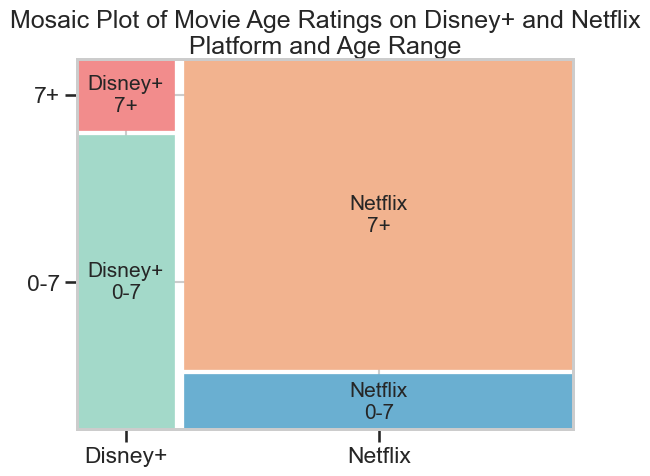

In [93]:
# Redefine age ranges with only two categories
def categorize_age_simple(age):
    return '0-7' if age <= 7 else '7+'

# Apply new age categorization
df['Age Range Simple'] = df['Age'].apply(categorize_age_simple)

# Update the frequency table for the new age ranges
age_platform_data_simple = df.melt(
    id_vars=['Age Range Simple'], 
    value_vars=['Netflix', 'Disney+'], 
    var_name='Platform', 
    value_name='Available'
)
age_platform_data_simple = age_platform_data_simple[age_platform_data_simple['Available'] == 1]

# Create the updated frequency table for the simplified age ranges
freq_table_simple = age_platform_data_simple.groupby(['Platform', 'Age Range Simple']).size()

color_palette_softer = {
    ('Netflix', '0-7'): '#6aafd1',  # Soft blue for Netflix 0-7
    ('Netflix', '7+'): '#f2b38f',   # Light peach for Netflix 7+
    ('Disney+', '0-7'): '#a3d9c9',  # Gentle teal for Disney+ 0-7
    ('Disney+', '7+'): '#f28c8c'    # Muted coral for Disney+ 7+
}



# Draw the simplified mosaic plot
plt.figure(figsize=(50, 50))
mosaic(freq_table_simple, 
       title='Mosaic Plot of Movie Age Ratings on Disney+ and Netflix', 
       gap=0.02, 
       properties=lambda key: {'color': color_palette_softer[key], 'edgecolor': 'black', 'linewidth': 0.5})

plt.xlabel('Platform and Age Range')
plt.ylabel('Proportion')
plt.show()


/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/1237700599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=rotten_tomatoes_data, x='Platform', y='Rotten Tomatoes', jitter=True, alpha=0.7, palette='Set2', dodge=True)


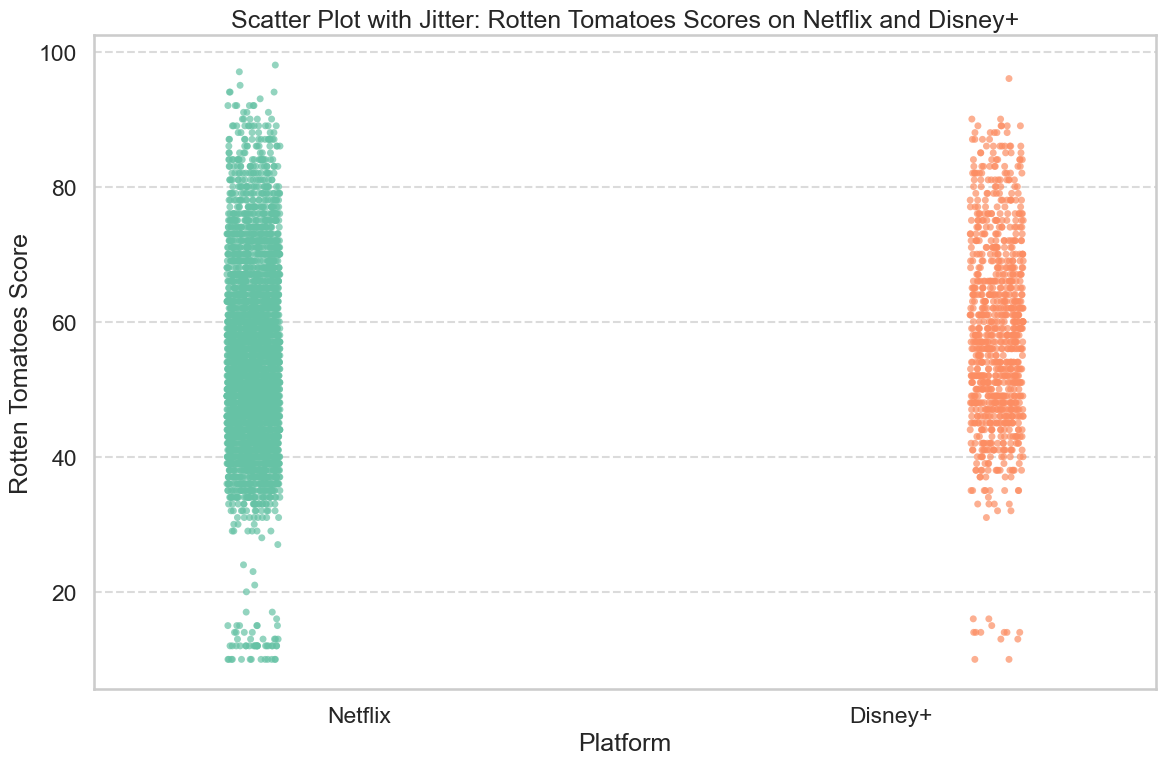

In [94]:
import seaborn as sns

# Filter data for Rotten Tomatoes scores on Netflix and Disney+
rotten_tomatoes_data = df[(df['Netflix'] == 1) | (df['Disney+'] == 1)].copy()
rotten_tomatoes_data['Platform'] = rotten_tomatoes_data.apply(lambda x: 'Netflix' if x['Netflix'] == 1 else 'Disney+', axis=1)

# Scatter plot with jitter for Rotten Tomatoes scores by platform
plt.figure(figsize=(12, 8))
sns.stripplot(data=rotten_tomatoes_data, x='Platform', y='Rotten Tomatoes', jitter=True, alpha=0.7, palette='Set2', dodge=True)

# Aesthetics
plt.title('Scatter Plot with Jitter: Rotten Tomatoes Scores on Netflix and Disney+')
plt.xlabel('Platform')
plt.ylabel('Rotten Tomatoes Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/4107689651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_netflix_data['Platform'] = disney_netflix_data.apply(
/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/4107689651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/7j/8cdcl4hs7mzfnl5lymfxwwn00000gn/T/ipykernel_80813/4107689651.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


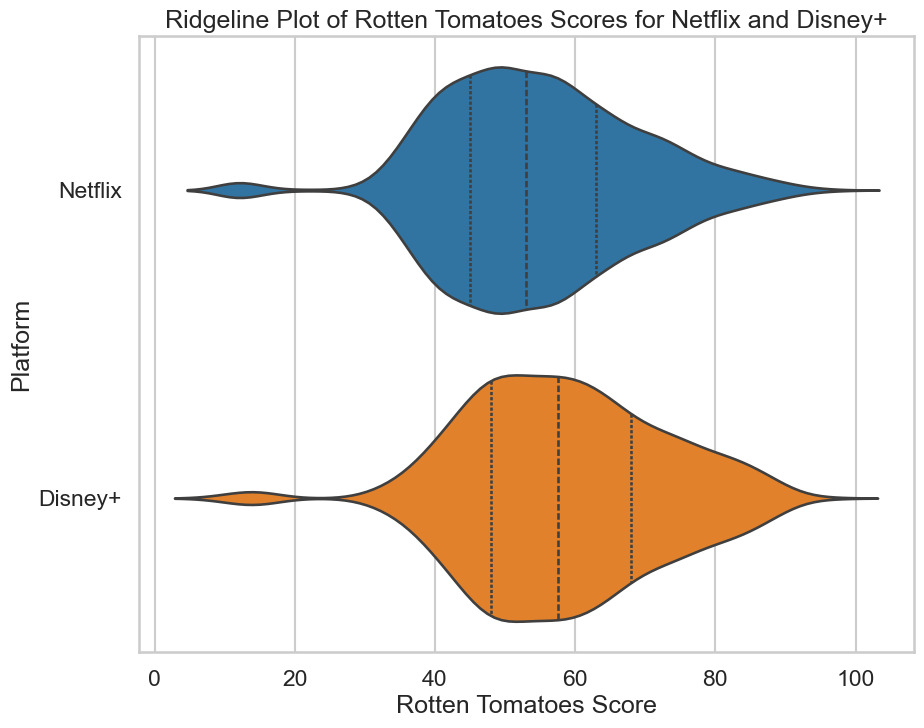

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Disney+ and Netflix
disney_netflix_data = df[(df['Netflix'] == 1) | (df['Disney+'] == 1)]

# Add a column to specify the platform
disney_netflix_data['Platform'] = disney_netflix_data.apply(
    lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1
)

# Plot the ridgeline plot
plt.figure(figsize=(10, 8))
sns.violinplot(
    x='Rotten Tomatoes', 
    y='Platform', 
    data=disney_netflix_data, 
    scale='width', 
    inner='quartile',
    palette={'Netflix': '#1f77b4', 'Disney+': '#ff7f0e'} 
)

plt.title('Ridgeline Plot of Rotten Tomatoes Scores for Netflix and Disney+')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Platform')
plt.show()


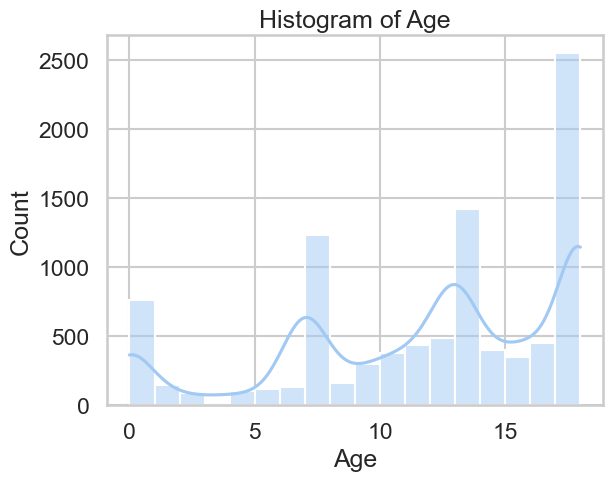

Shapiro-Wilk Test: Statistic=0.891, p=0.000
Kolmogorov-Smirnov Test: Statistic=0.900, p=0.000


/Users/mohammad/.pyenv/versions/3.10.0/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9515.
  res = hypotest_fun_out(*samples, **kwds)


In [96]:
from scipy.stats import shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(df['Age'], kde=True)
plt.title("Histogram of Age")
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(df['Age'])
print('Shapiro-Wilk Test: Statistic=%.3f, p=%.3f' % (stat, p))

# Kolmogorov-Smirnov test
from scipy.stats import kstest
ks_stat, ks_p = kstest(df['Age'], 'norm')
print('Kolmogorov-Smirnov Test: Statistic=%.3f, p=%.3f' % (ks_stat, ks_p))


In [97]:
from scipy.stats import mannwhitneyu

# Placeholder for Mann-Whitney U test results
# In a functional environment, this code would run after successful dataset load

try:
    # Assuming previously loaded 'data' for 'Age' comparison
    netflix_age = df[df['Netflix'] == 1]['Year']
    disney_age = df[df['Disney+'] == 1]['Year']

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(netflix_age, disney_age, alternative='two-sided')

    # Interpret and display results
    print(f"Mann-Whitney U test statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Conclusion: There is a statistically significant difference between Netflix and Disney+ movie ages.")
    else:
        print("Conclusion: There is no statistically significant difference between Netflix and Disney+ movie ages.")

except Exception as e:
    print(f"Error: {e}")



Mann-Whitney U test statistic: 2592969.0
P-value: 2.5196589652606384e-134
Conclusion: There is a statistically significant difference between Netflix and Disney+ movie ages.


In [98]:
from scipy.stats import mannwhitneyu

# Placeholder for Mann-Whitney U test results
# In a functional environment, this code would run after successful dataset load

try:
    # Assuming previously loaded 'data' for Rotten Tomatoes comparison
    netflix_scores = df[df['Netflix'] == 1]['Rotten Tomatoes']
    disney_scores = df[df['Disney+'] == 1]['Rotten Tomatoes']

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(netflix_scores, disney_scores, alternative='two-sided')

    # Interpret and display results
    print(f"Mann-Whitney U test statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Conclusion: There is a statistically significant difference between Netflix and Disney+ Rotten Tomatoes scores.")
    else:
        print("Conclusion: There is no statistically significant difference between Netflix and Disney+ Rotten Tomatoes scores.")

except Exception as e:
    print(f"Error: {e}")


Mann-Whitney U test statistic: 1418549.0
P-value: 3.578210028929478e-15
Conclusion: There is a statistically significant difference between Netflix and Disney+ Rotten Tomatoes scores.


In [99]:
from scipy.stats import rankdata

# Combine scores and assign ranks
combined_scores = pd.concat([netflix_scores, disney_scores])
ranks = rankdata(combined_scores)

# Separate ranks for Netflix and Disney+
netflix_ranks = ranks[:len(netflix_scores)]
disney_ranks = ranks[len(netflix_scores):]

# Calculate mean ranks
print(f"Mean rank for Netflix: {netflix_ranks.mean()}")
print(f"Mean rank for Disney+: {disney_ranks.mean()}")


Mean rank for Netflix: 2231.9104194857914
Mean rank for Disney+: 2617.943600867679


In [100]:
from scipy.stats import rankdata

# Combine scores and assign ranks
combined_scores = pd.concat([netflix_age, disney_age])
ranks = rankdata(combined_scores)

# Separate ranks for Netflix and Disney+
netflix_ranks = ranks[:len(netflix_age)]
disney_ranks = ranks[len(netflix_age):]

# Calculate mean ranks
print(f"Mean rank for Netflix: {netflix_ranks.mean()}")
print(f"Mean rank for Disney+: {disney_ranks.mean()}")

Mean rank for Netflix: 2549.750744248985
Mean rank for Disney+: 1344.1691973969632
